<a href="https://colab.research.google.com/github/Neel1097/Malaria-Detection-using-CNN/blob/master/Malaria1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# All Import
All nessecary imports are imported

In [0]:
import numpy as np
np.random.seed(1000)
import os
import cv2
import matplotlib
import pandas
import csv
import tensorflow as tf
from tensorflow import keras
import sys
import zipfile
from google.colab import drive
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

# Connecting Kaggle to colab
Kaggle is connected to Colab and the malaria dataset is download is Drive.

In [0]:
# Colab library to upload files to notebook....upload kaggle api
from google.colab import files
files.upload()
#Verify the Token is present
!ls -lha kaggle.json
# Install Kaggle library
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#Downloading the dataset
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 64 Apr  5 12:13 kaggle.json
 98% 665M/675M [00:10<00:00, 79.0MB/s]
100% 675M/675M [00:10<00:00, 65.5MB/s]


# Extracting Data from ZIP
The downloaded dataset comes in the form of ZIP file..So, we have to extract the data from it. Then, The data is Stored is temporary file i.e, 'malaria'.

In [0]:
drive.mount('/content/drive/')
print(os.listdir("/content"))

local_zip = '/content/cell-images-for-detecting-malaria.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/malaria')
zip_ref.close()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
['.config', 'kaggle.json', 'drive', 'cell-images-for-detecting-malaria.zip', 'sample_data']


# Preprocessing the dataset
Reshaping the Image to (64,64,3) dimension. The image is labelled and categorized into two classes i.e, Parasitized and Uninfected.

In [0]:
image_dir='/tmp/malaria/cell_images/cell_images/'
INPUT_shape=64
dataset = []
label = []
para_images = os.listdir(image_dir+'Parasitized/')
for i,image_name in enumerate(para_images):
   if(image_name.split('.')[1]=='png'):
     image = cv2.imread(image_dir+'Parasitized/'+image_name)
     image = Image.fromarray(image,'RGB')
     image = image.resize((INPUT_shape,INPUT_shape))
     dataset.append(np.array(image))
     label.append(0)


un_images = os.listdir(image_dir+'Uninfected/')
for i,image_name in enumerate(un_images):
   if(image_name.split('.')[1]=='png'):
     image = cv2.imread(image_dir+'Uninfected/'+image_name)
     image = Image.fromarray(image,'RGB')
     image = image.resize((INPUT_shape,INPUT_shape))
     dataset.append(np.array(image))
     label.append(1)

# Visualising the Data
Displaying a batch of 8 Parasitized and 8 Uninfected pictures. We can rerun the cell to see a fresh batch each time.

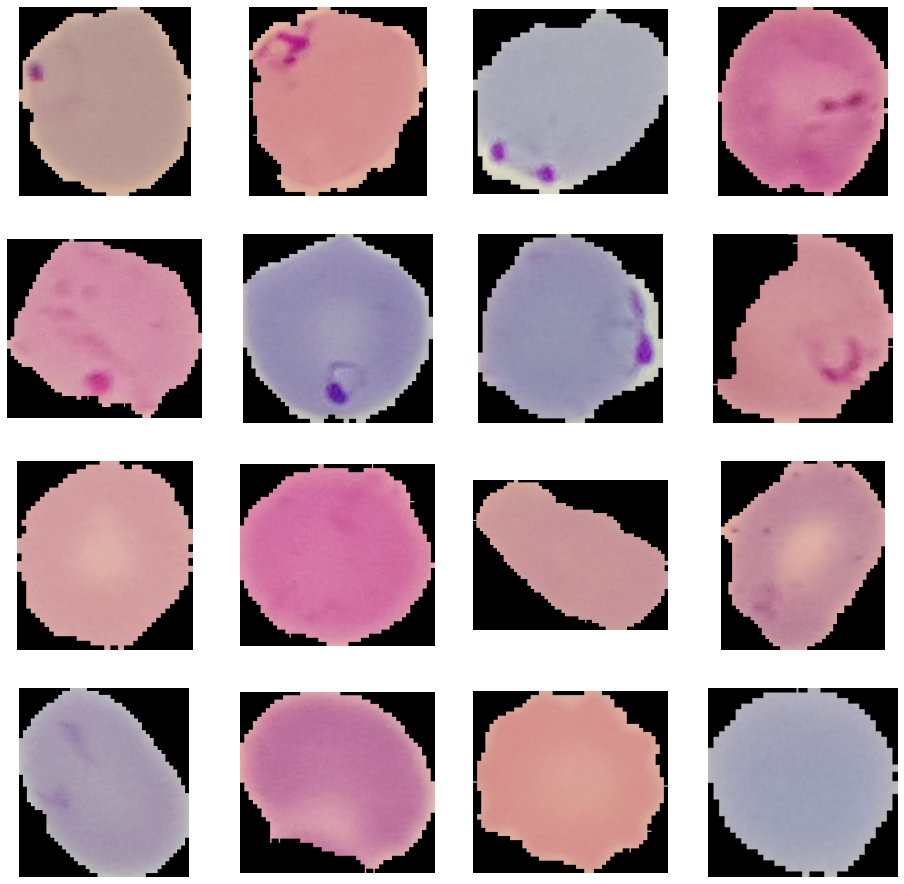

In [0]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8 #Only 8 pic are shown.....change it to show different pic. 

next_para_pix = [os.path.join((image_dir+'Parasitized/'), fname) 
                for fname in para_images[ pic_index-8:pic_index] 
               ]

next_un_pix = [os.path.join((image_dir+'Uninfected/'), fname) 
                for fname in un_images[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_para_pix+next_un_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Designing The Model and the summary of it

In [0]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(INPUT_shape,INPUT_shape,3)),
                                  tf.keras.layers.MaxPooling2D((2,2)),
                                  tf.keras.layers.BatchNormalization(axis = -1),
                                  tf.keras.layers.Dropout(0.2),

                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D((2,2)),
                                  tf.keras.layers.BatchNormalization(axis = -1),
                                  tf.keras.layers.Dropout(0.2),

                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.BatchNormalization(axis=-1),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(256,activation='relu'),
                                  tf.keras.layers.BatchNormalization(axis=-1),
                                  tf.keras.layers.Dropout(0.2),

                                  tf.keras.layers.Dense(2,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        1

# Compiling and Spliting into Train and Test Data

In [0]:
model.compile(optimizer ='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras.utils import to_categorical
X_train,X_test,Y_train,Y_test = train_test_split(dataset,to_categorical(np.array(label)), test_size=0.2, random_state=0)

Using TensorFlow backend.


# Fitting the Data into the Model

In [0]:
history = model.fit(np.array(X_train),Y_train,batch_size=64,epochs=25,validation_split=0.1,shuffle=False)

Epoch 1/25
311/311 [==============================] - 4s 14ms/step - loss: 0.4269 - accuracy: 0.8155 - val_loss: 0.6406 - val_accuracy: 0.6780
Epoch 2/25
311/311 [==============================] - 4s 13ms/step - loss: 0.2330 - accuracy: 0.9159 - val_loss: 0.3246 - val_accuracy: 0.8939
Epoch 3/25
311/311 [==============================] - 4s 14ms/step - loss: 0.1940 - accuracy: 0.9320 - val_loss: 0.2267 - val_accuracy: 0.9256
Epoch 4/25
311/311 [==============================] - 4s 14ms/step - loss: 0.1707 - accuracy: 0.9393 - val_loss: 0.2264 - val_accuracy: 0.9220
Epoch 5/25
311/311 [==============================] - 4s 13ms/step - loss: 0.1498 - accuracy: 0.9472 - val_loss: 0.2318 - val_accuracy: 0.9116
Epoch 6/25
311/311 [==============================] - 4s 13ms/step - loss: 0.1313 - accuracy: 0.9529 - val_loss: 0.3592 - val_accuracy: 0.8771
Epoch 7/25
311/311 [==============================] - 4s 14ms/step - loss: 0.1122 - accuracy: 0.9594 - val_loss: 0.2125 - val_accuracy: 0.9320

In [0]:
#Printing the Test Accuracy
print("Test Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test),np.array(Y_test))[1]*100))

173/173 [==============================] - 1s 3ms/step - loss: 0.2440 - accuracy: 0.9534
Test Accuracy: 95.34%


# Plotting the Accuracy and Loss Of the Model

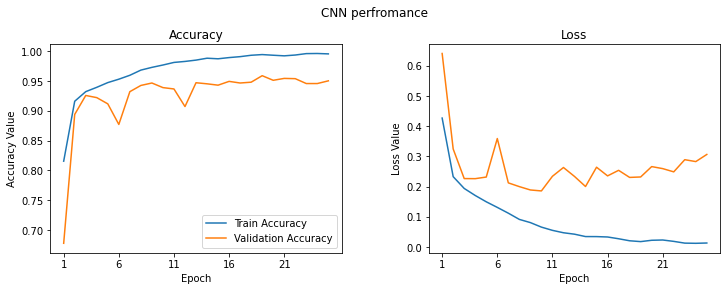

In [0]:
import matplotlib.pyplot as plt
f, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
t= f.suptitle('CNN perfromance',fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)


max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1,max_epoch,5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1,max_epoch,5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l1 = ax1.legend(loc="best")

model.save('malaria_Cnn.h5')

# Visualising the C-NN Model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in true_divide


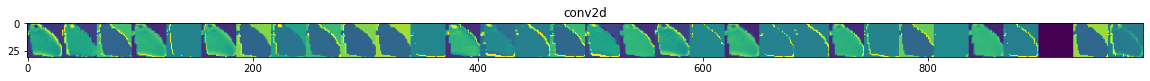

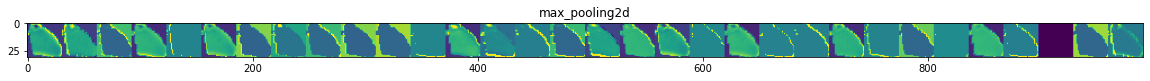

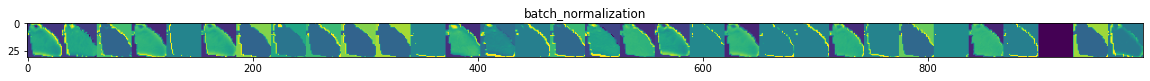

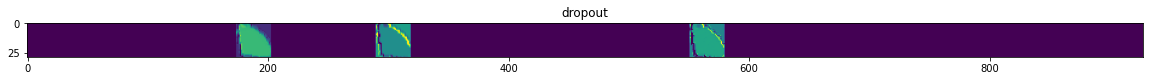

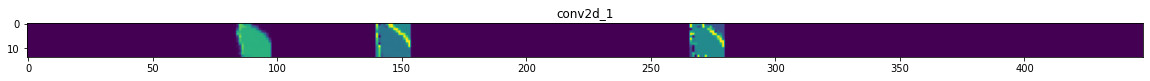

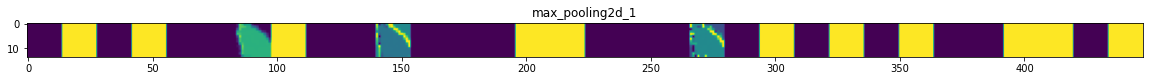

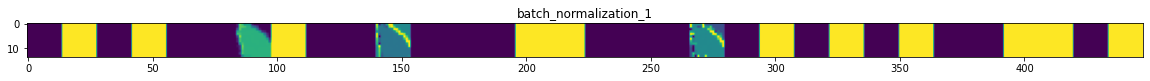

In [0]:
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
para_img_files = [os.path.join((image_dir+'Parasitized/'), f) for f in para_images]
un_img_files = [os.path.join((image_dir+'Uninfected/'), f) for f in un_images]

img_path = np.random.choice(para_img_files + un_img_files)
img = load_img(img_path, target_size=(64,64))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 